In [37]:
import torch
import torchinfo
import torch.nn as nn
from PIL import Image
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
# from torchvision.models.feature_extraction import get_graph_node_names
# from torchvision.models.feature_extraction import create_feature_extractor
from sklearn.metrics import confusion_matrix

import dsutils 
import metrics


import os
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')

Using cpu for inference


In [3]:
# Load Jacobians

Jrn50_rxN = np.load('rnet50_Jacobian_rbyN_images1to1029.npy')
Jrn18_rxN = np.load('rnet18_Jacobian_rbyN_images1to1029.npy')
Janet_rxN = np.load('anet_Jacobian_rbyN_images1to1029.npy')

In [39]:
Nrn50 = Jrn50_rxN.shape[2]
Nrn18 = Jrn18_rxN.shape[2]
Nanet = Janet_rxN.shape[2]

M = Jrn50_rxN.shape[0]

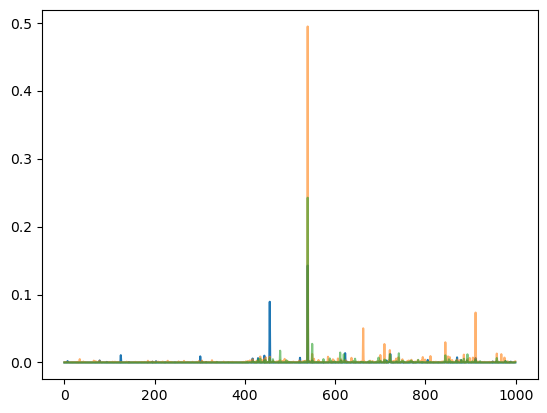

In [40]:
image = 539
plt.plot(np.linalg.norm(Janet_rxN[image],axis=1))
plt.plot(np.linalg.norm(Jrn50_rxN[image],axis=1),alpha=0.6)
plt.plot(np.linalg.norm(Jrn18_rxN[image],axis=1),alpha=0.6)


In [ ]:
db2 = []
for i in np.arange(M):
    A = Jrn50_rxN[i]@Jrn50_rxN[i].T
    B = Jrn50_rxN[i]@Jrn50_rxN[i].T
    # C = Jrn18_rxN[i]@Jrn18_rxN[i].T
    db2.append(metrics.sq_bures_metric((1/Nrn50)**1 * A,(1/Nanet)**1 * B))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
